# Usage example: EEG preprocessing multiverse

We first define the forking paths:

In [1]:
from comet.multiverse import Multiverse

forking_paths = {
    "software": ['MNE', 'FieldTrip', 'EEGLab'],
    "normalization": ['min-max', 'relative', 'z-score', 'baseline'],
    "electrode": ['Pz', 'O1', 'O2', 'P3', 'P4'],
    "rejection": [80, 90, 100],
    "ica": [True]
}

The template script then adds some signal + noise to a baseline value to create artificial data that systematically variates with some decisions:

In [2]:
def analysis_template():
    import os
    import comet
    import numpy as np

    base_value = 2
    if {{normalization}} == 'z-score':
        base_value += 0.3
    if {{electrode}} == 'Pz':
        base_value += 1.0
    if {{rejection}} == 80:
        base_value += 0.4
    outcome = base_value + np.random.normal(0, 0.5)

    result = {
        "P100 amplitude\ndifference across\nconditions (μV)": round(outcome, 3)
    }

    comet.data.save_universe_results(result, universe=os.path.abspath(__file__))

We can then create and run the multiverse:

In [3]:
multiverse = Multiverse(name="example_eeg")
multiverse.create(analysis_template, forking_paths)
multiverse.summary()
#multiverse.run(parallel=10)

,Universe,software,normalization,electrode,rejection,ica
0,Universe_1,MNE,min-max,Pz,80,True
1,Universe_2,MNE,min-max,Pz,90,True
2,Universe_3,MNE,min-max,Pz,100,True
3,Universe_4,MNE,min-max,O1,80,True
4,Universe_5,MNE,min-max,O1,90,True


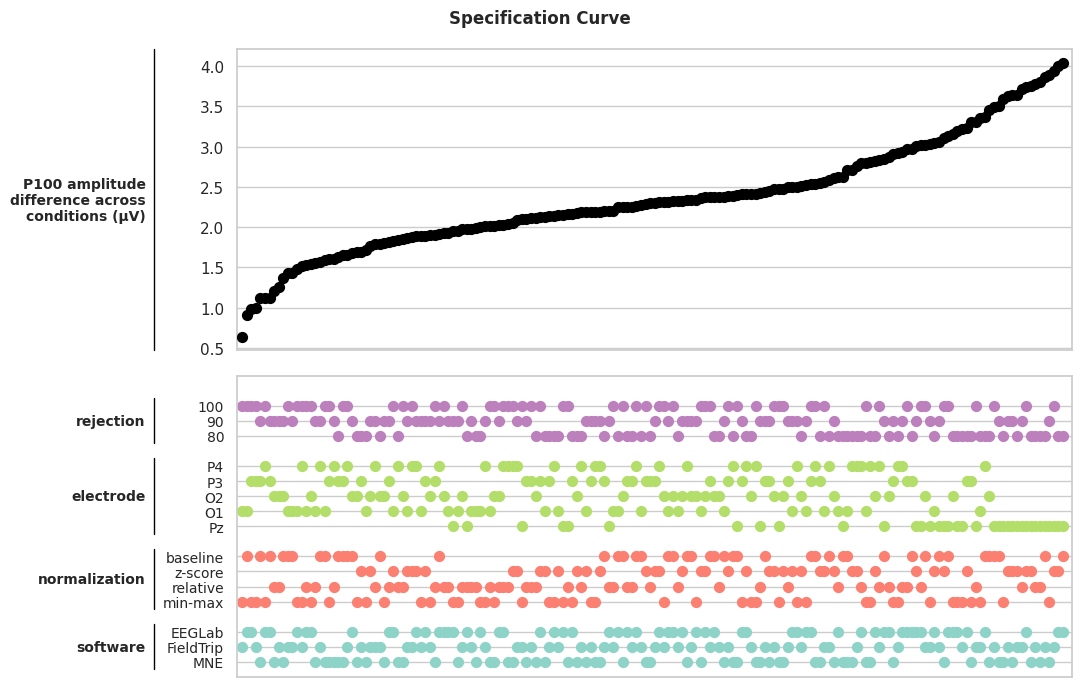

In [4]:
multiverse.specification_curve(measure='P100 amplitude\ndifference across\nconditions (μV)', title="Specification Curve", \
                               cmap="Set3", figsize=(11,7), fontsize=10, height_ratio=[1,1], label_offset=-0.1)